# 1 Data Source

## 1.1 Importing Packages

In [107]:
# base packages
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dealing with imbalanced data
from imblearn.over_sampling import RandomOverSampler

# classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Standardization
from sklearn.preprocessing import StandardScaler

# jarque bera normality test
from scipy.stats import jarque_bera

# qqplot
import statsmodels.api as sm

## 1.2 Importing Data

### 1.2.1 Users

In [4]:
users=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/relax_challenge/takehome_users.csv', encoding='latin-1')

In [5]:
# checking size of users
users.shape

(12000, 10)

In [6]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### 1.2.2 User Engagement

In [7]:
engagement=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/relax_challenge/takehome_user_engagement.csv')

In [8]:
engagement.shape

(207917, 3)

In [9]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# 2 Data Wrangling

## 2.1 Users

### 2.1.1 Data Type

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [11]:
# object_id to string
users.object_id=users.object_id.astype(str)

# creating time to datetime
users.creation_time=pd.to_datetime(users.creation_time)

# last_session_creation_time to datetime
users.last_session_creation_time=pd.to_datetime(users.last_session_creation_time)

# org_id to string
users.org_id=users.org_id.astype(str)

# invited_by_user_id to string
users['invited_by_user_id']=users['invited_by_user_id'].astype(str)

In [12]:
# ensuring data types
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  object        
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  object        
 9   invited_by_user_id          12000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 937.6+ KB


### 2.1.2 Range Constraints

In [13]:
users.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip
count,12000.000000,12000.000000
mean,0.249500,0.149333
std,0.432742,0.356432
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [14]:
# creation time
users.creation_time.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   12000
unique                  11996
top       2014-02-11 17:57:53
freq                        2
first     2012-05-31 00:43:27
last      2014-05-30 23:59:19
Name: creation_time, dtype: object

In [15]:
# last creation session time
users.last_session_creation_time.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                              8823
unique                             8821
top       1970-01-01 00:00:01.401868018
freq                                  2
first     1970-01-01 00:00:01.338452406
last      1970-01-01 00:00:01.402066730
Name: last_session_creation_time, dtype: object

### 2.1.3 Text Mismatch

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  object        
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  object        
 9   invited_by_user_id          12000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 937.6+ KB


In [17]:
users.object_id.unique()

array(['1', '2', '3', ..., '11998', '11999', '12000'], dtype=object)

In [18]:
users.name.unique()

array(['Clausen August', 'Poole Matthew', 'Bottrill Mitchell', ...,
       'Haynes Jake', 'Faber Annett', 'Lima Thaís'], dtype=object)

In [19]:
users.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [20]:
users.org_id.unique()

array(['11', '1', '94', '193', '197', '37', '74', '302', '318', '69',
       '130', '254', '0', '175', '211', '2', '58', '54', '7', '6', '123',
       '81', '56', '134', '92', '251', '283', '98', '401', '33', '59',
       '109', '276', '208', '332', '64', '235', '63', '14', '4', '127',
       '32', '224', '304', '61', '51', '229', '88', '325', '150', '347',
       '203', '21', '409', '215', '141', '5', '107', '184', '310', '367',
       '389', '89', '242', '68', '16', '49', '185', '91', '172', '8',
       '43', '249', '26', '139', '70', '10', '252', '53', '119', '3',
       '196', '335', '375', '303', '307', '25', '370', '83', '27', '306',
       '118', '295', '19', '301', '100', '112', '263', '39', '12', '86',
       '402', '42', '103', '373', '268', '30', '406', '48', '313', '9',
       '138', '261', '35', '264', '95', '55', '60', '234', '28', '410',
       '170', '374', '15', '17', '364', '62', '244', '342', '225', '121',
       '255', '411', '217', '165', '415', '104', '329', '278'

In [21]:
users['invited_by_user_id'].unique()

array(['10803.0', '316.0', '1525.0', ..., '5093.0', '11854.0', '5450.0'],
      dtype=object)

### 2.1.4 Unique values

In [22]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [23]:
users.duplicated(subset=['object_id'],keep='first').sum()

0

In [24]:
# duplicated email addresses
users.duplicated(subset=['email'],keep='first').sum()

20

In [25]:
# duplicated names
users.duplicated(subset=['name'],keep='first').sum()

645

In [26]:
# duplicated name and email
users.duplicated(subset=['name','email'], keep='first').sum()

19

There can be customers with the same name; however, customers cannot have the same email address; therefore, the 19 people with the same name and email address are likely the same person who has created another account. Thus, we will drop the 19 duplicated users.

In [27]:
# drop duplicated
users.drop_duplicates(subset=['name','email'],keep='first',inplace=True)

In [28]:
# checking that duplicates are removed
users.duplicated(subset=['name','email'],keep='first').sum()

0

### 2.1.5 Missing Values

In [29]:
missing_df=pd.DataFrame(users.isna().sum(),columns=['num_missing'])
missing_df.head()

,num_missing
object_id,0
creation_time,0
name,0
email,0
creation_source,0


In [30]:
missing_df['perc']=missing_df.num_missing.div(users.shape[0])
missing_df

,num_missing,perc
object_id,0,0.000000
creation_time,0,0.000000
name,0,0.000000
email,0,0.000000
creation_source,0,0.000000
last_session_creation_time,3173,0.264836
opted_in_to_mailing_list,0,0.000000
enabled_for_marketing_drip,0,0.000000
org_id,0,0.000000
invited_by_user_id,0,0.000000


In [31]:
# drop last_session_creation_time
users.drop(columns=['last_session_creation_time'],inplace=True)

# ensuring column was dropped
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0


## 2.2 User Engagement

### 2.2.1 Data Type

In [32]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [33]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [34]:
# time_stamp to datetime
engagement.time_stamp=pd.to_datetime(engagement.time_stamp)

#user_id to string
engagement.user_id=engagement.user_id.astype(str)

In [35]:
# checking datatypes
engagement.dtypes

time_stamp    datetime64[ns]
user_id               object
visited                int64
dtype: object

### 2.2.2 Range Constraints

In [36]:
engagement.describe()

,visited
count,207917.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [37]:
engagement.time_stamp.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  207917
unique                 207220
top       2013-04-06 21:21:37
freq                        2
first     2012-05-31 08:20:06
last      2014-06-06 14:58:50
Name: time_stamp, dtype: object

### 2.2.3 Text Mismatch

In [38]:
engagement.user_id.unique()

array(['1', '2', '3', ..., '11998', '11999', '12000'], dtype=object)

### 2.2.4 Unique Vaues

In [39]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [40]:
# duplicated time_stamp
engagement.duplicated(subset=['time_stamp'], keep='first').sum()

697

In [41]:
# duplicated user_id
engagement.duplicated(subset=['user_id'],keep='first').sum()

199094

### 2.2.5 Missing Values

In [42]:
engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

## 2.3 Saving Data

In [43]:
# saving user data
users.to_csv('/content/drive/MyDrive/machine_learning_projects/relax_challenge/takehome_users_cleaned.csv')

In [44]:
# saving engagement data
engagement.to_csv('/content/drive/MyDrive/machine_learning_projects/relax_challenge/takehome_user_engagement_cleaned.csv')

# 3 EDA

## 3.1 Import Data

In [45]:
users=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/relax_challenge/takehome_users_cleaned.csv')
engagement=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/relax_challenge/takehome_user_engagement_cleaned.csv')

### 3.1.1 Users

In [46]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  11981 non-null  int64  
 1   object_id                   11981 non-null  int64  
 2   creation_time               11981 non-null  object 
 3   name                        11981 non-null  object 
 4   email                       11981 non-null  object 
 5   creation_source             11981 non-null  object 
 6   opted_in_to_mailing_list    11981 non-null  int64  
 7   enabled_for_marketing_drip  11981 non-null  int64  
 8   org_id                      11981 non-null  int64  
 9   invited_by_user_id          6409 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 936.1+ KB


In [47]:
# drop Unnamed: 0
users.drop(columns=['Unnamed: 0'], inplace=True)

In [48]:
# object_id to string
users.object_id=users.object_id.astype(str)

# creation_time to date time
users.creation_time=pd.to_datetime(users.creation_time)

# org_id to string
users.org_id=users.org_id.astype(str)

# invited_by_user_id to string
users['invited_by_user_id']=users.invited_by_user_id.astype(str)

In [49]:
# checking data types
users.dtypes

object_id                             object
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                object
invited_by_user_id                    object
dtype: object

### 3.1.2 Engagement

In [50]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  207917 non-null  int64 
 1   time_stamp  207917 non-null  object
 2   user_id     207917 non-null  int64 
 3   visited     207917 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ MB


In [51]:
# drop Unnamed: 0
engagement.drop(columns=['Unnamed: 0'], inplace=True)

In [52]:
# time_stamp to datetime
engagement.time_stamp=pd.to_datetime(engagement.time_stamp)

# user_id to string
engagement.user_id=engagement.user_id.astype(str)

## 3.2 Adopted User

An adopted user is a user who has logged into the system on three different occasions in 7 days. Thus, once a user has done this they are considered adopted even if they haven't logged onto the system in months, so this information will be created in the users data frame since it is a characteristic of the user.

In [53]:
# creating a year column
engagement['year']=engagement.time_stamp.dt.year
# creating weekly column
engagement['week']=engagement.time_stamp.dt.week

# checking results
engagement.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,time_stamp,user_id,visited,year,week
0,2014-04-22 03:53:30,1,1,2014,17
1,2013-11-15 03:45:04,2,1,2013,46
2,2013-11-29 03:45:04,2,1,2013,48
3,2013-12-09 03:45:04,2,1,2013,50
4,2013-12-25 03:45:04,2,1,2013,52


In [54]:
# groupby user, year, and week
log_on_week=engagement.groupby(['user_id','year','week'])['visited'].sum()

# create dataframe
log_on_week_df=pd.DataFrame(log_on_week.values, index=log_on_week.index, columns=['num_weekly_logon'])

# checking new data frame
log_on_week_df.head()

num_weekly_logon
user_id year week                  
1       2014 17                   1
10      2013 1                    1
             3                    1
             4                    1
             5                    1

In [55]:
del log_on_week

In [56]:
# finding user's who have logged on at least 3 times in a week
adopted_user_count=log_on_week_df[log_on_week_df['num_weekly_logon']>=3]

adopted_user_count.head()

num_weekly_logon
user_id year week                  
10      2013 9                    3
             15                   3
             17                   3
             18                   4
             19                   5

In [57]:
adopted_user_count.reset_index(inplace=True)

adopted_user=set(adopted_user_count.user_id)

In [58]:
def adpoted_user_fctn(row):
  if row in adopted_user:
    return 1
  else: 
    return 0

In [59]:
users['adopted_user']=users.object_id.apply(lambda row: adpoted_user_fctn(row))

users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0


## 3.3 Users Univariate Statistics

In [60]:
# looking at the type of variables 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   11981 non-null  object        
 1   creation_time               11981 non-null  datetime64[ns]
 2   name                        11981 non-null  object        
 3   email                       11981 non-null  object        
 4   creation_source             11981 non-null  object        
 5   opted_in_to_mailing_list    11981 non-null  int64         
 6   enabled_for_marketing_drip  11981 non-null  int64         
 7   org_id                      11981 non-null  object        
 8   invited_by_user_id          11981 non-null  object        
 9   adopted_user                11981 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 936.1+ KB


In [61]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,11981.0,0.249395,0.432681,0.0,0.0,0.0,0.0,1.0
enabled_for_marketing_drip,11981.0,0.149236,0.356336,0.0,0.0,0.0,0.0,1.0
adopted_user,11981.0,0.120524,0.325587,0.0,0.0,0.0,0.0,1.0


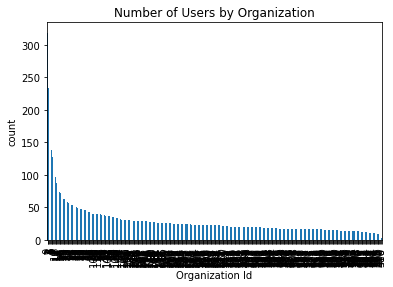

In [62]:
users.org_id.value_counts().plot.bar()
plt.xlabel('Organization Id')
plt.ylabel('count')
plt.title('Number of Users by Organization')
plt.show()

In [63]:
# finding number of organization ids
len(users.org_id.value_counts())

417

There are 417 different organization id's, which are too many to effectively analyze. Thus, I will need to bin them if I want to use it in my models. 

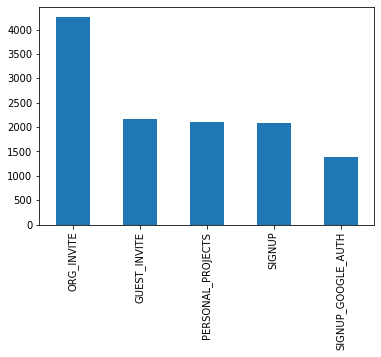

In [64]:
# distribution of creation_source
users.creation_source.value_counts().plot.bar()
plt.show()

## 3.4 Engagement Univariate Statistics

In [65]:
# checking variable types
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  object        
 2   visited     207917 non-null  int64         
 3   year        207917 non-null  int64         
 4   week        207917 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ MB


Engagement data doesn't need to be analyzed since it doesn't impact user data, but may need to reevaluate in the pre-processing phase

## 3.5 Multivariate Statistics

In [66]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   11981 non-null  object        
 1   creation_time               11981 non-null  datetime64[ns]
 2   name                        11981 non-null  object        
 3   email                       11981 non-null  object        
 4   creation_source             11981 non-null  object        
 5   opted_in_to_mailing_list    11981 non-null  int64         
 6   enabled_for_marketing_drip  11981 non-null  int64         
 7   org_id                      11981 non-null  object        
 8   invited_by_user_id          11981 non-null  object        
 9   adopted_user                11981 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 936.1+ KB


In [67]:
def two_var_bar_chart(df,var1, var2, var3, funct):
  df.pivot_table(index=var1, columns=var2, values=var3, aggfunc=funct).plot.bar()
  plt.show()

### 3.5.1 Adopted User and Creation Source

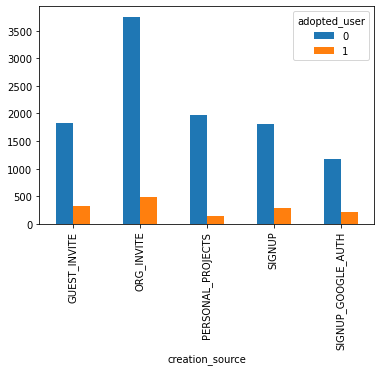

In [68]:
two_var_bar_chart(df=users, var1='creation_source', var2='adopted_user', var3='object_id', funct='count')

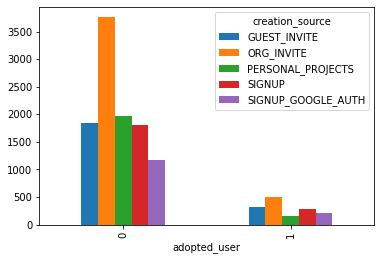

In [69]:
two_var_bar_chart(df=users, var1='adopted_user', var2='creation_source', var3='object_id', funct='count')

### 3.5.2 Adopted User and Mailing List

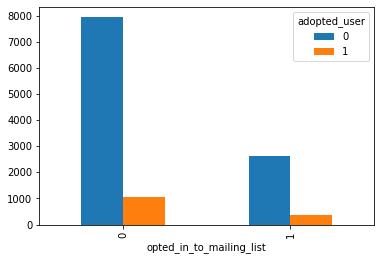

In [70]:
two_var_bar_chart(df=users, var1='opted_in_to_mailing_list', var2='adopted_user', var3='object_id', funct='count')

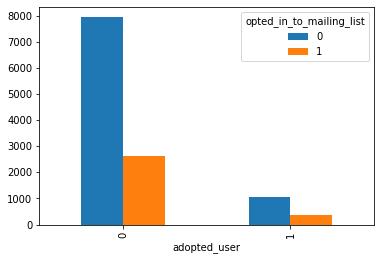

In [71]:
two_var_bar_chart(df=users, var1='adopted_user', var2='opted_in_to_mailing_list', var3='object_id', funct='count')

### 3.5.3 Adopted Users and Marketing

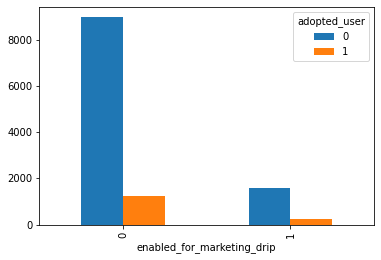

In [72]:
two_var_bar_chart(df=users, var1='enabled_for_marketing_drip', var2='adopted_user', var3='object_id', funct='count')

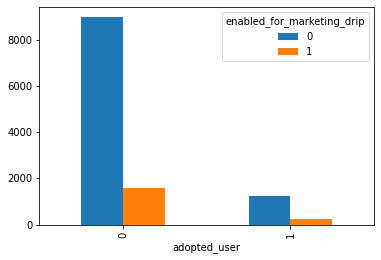

In [73]:
two_var_bar_chart(df=users, var1='adopted_user', var2='enabled_for_marketing_drip', var3='object_id', funct='count')

## 3.6 EDA Summary

Adopted Users only account for 12% of users; thus, the majority of users did not adopt the platform, which is why the two variable bar charts appear to provide little information. Additionally, 25% of users opted into the mailing list while 15% opted into the marketing. There are 417 different orgainzation id's, so we will need to group organization id's if we want to use them in our model.

# 4 Preprocessing

Since we are primarily interested in determing which factors predict future adoption, we will not split our data into train and test set. We do this only because we don't want to predict wheter or not a person adopts but which factors increase the liklihood of adoption. 

We will use creation source, mailing list and marketing drip to predict adoption. 

Since we are interested in explainability, we will use logistic regression, so we need to create dummy variables for the creation source. Furthermore, since only 12% of the data are adopted users, and we are interested in adopted users, we need to over sample from the adopted user class. Additionally, to understand which factors impacted user adoption, it is important we discover all adopted users; recall is the ratio of predicted adopted users to the total number of actual adopted users. Therefore, we will use recall as our metric.  

In [74]:
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0


In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   11981 non-null  object        
 1   creation_time               11981 non-null  datetime64[ns]
 2   name                        11981 non-null  object        
 3   email                       11981 non-null  object        
 4   creation_source             11981 non-null  object        
 5   opted_in_to_mailing_list    11981 non-null  int64         
 6   enabled_for_marketing_drip  11981 non-null  int64         
 7   org_id                      11981 non-null  object        
 8   invited_by_user_id          11981 non-null  object        
 9   adopted_user                11981 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 936.1+ KB


## 4.1 Encoding Creation Source

In [76]:
# encodes creation source
users_dummies=pd.get_dummies(users, columns=['creation_source'])

users_dummies.head()

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,0,193,5240.0,0,1,0,0,0,0


In [77]:
# renames the created dummy variables columns
old_col_names=[]
new_col_names=users.creation_source.value_counts().index

for column in new_col_names:
  old_col_names.append('creation_source_'+column)

In [78]:
old_col_names

['creation_source_ORG_INVITE',
 'creation_source_GUEST_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH']

In [79]:
new_col_names

Index(['ORG_INVITE', 'GUEST_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP',
       'SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [80]:
# rename dict
col_map={}

for value in range(len(old_col_names)):
  col_map[old_col_names[value]]=new_col_names[value]

col_map

{'creation_source_ORG_INVITE': 'ORG_INVITE',
 'creation_source_GUEST_INVITE': 'GUEST_INVITE',
 'creation_source_PERSONAL_PROJECTS': 'PERSONAL_PROJECTS',
 'creation_source_SIGNUP': 'SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH': 'SIGNUP_GOOGLE_AUTH'}

In [81]:
del old_col_names, new_col_names

In [82]:
users_dummies.rename(columns=col_map, inplace=True)
users_dummies.head()

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,0,193,5240.0,0,1,0,0,0,0


## 4.2 Dependent and Independent Variables

In [83]:
users_dummies.columns

Index(['object_id', 'creation_time', 'name', 'email',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'adopted_user', 'GUEST_INVITE', 'ORG_INVITE',
       'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [85]:
# creating predictor variabls
X=users_dummies.loc[:,['opted_in_to_mailing_list', 'enabled_for_marketing_drip','GUEST_INVITE', 'ORG_INVITE','PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH']]

In [86]:
# creating response variable
y=users_dummies.adopted_user

## 4.3 Imbalanced Data Set

In [90]:
over_sample=RandomOverSampler(sampling_strategy='minority')

In [91]:
X_over, y_over = over_sample.fit_resample(X,y)

# 5 Modeling

## 5.1 Creating the Model

In [94]:
# initiating the model
logit = LogisticRegression(fit_intercept=False)

In [95]:
# fitting the model
model=logit.fit(X_over, y_over)

## 5.2 Metrics

In [112]:
# confusion metric
confusion_matrix(y_over, model.predict(X_over))

array([[5721, 4816],
       [4524, 6013]])

In [113]:
recall_score(y_over, model.predict(X_over))

0.5706557843788554

## 5.3 Coefficients

In [122]:
pd.DataFrame(model.coef_, columns=model.feature_names_in_).T

,0
opted_in_to_mailing_list,0.043124
enabled_for_marketing_drip,0.003743
GUEST_INVITE,0.247848
ORG_INVITE,-0.080701
PERSONAL_PROJECTS,-0.667488
SIGNUP,0.146439
SIGNUP_GOOGLE_AUTH,0.244897


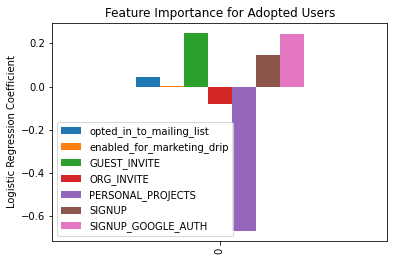

In [119]:
pd.DataFrame(model.coef_, columns=model.feature_names_in_).plot.bar()
plt.title('Feature Importance for Adopted Users')
plt.ylabel('Logistic Regression Coefficient')
plt.show()